In [3]:
import pandas as pd
import psycopg2
import sqlalchemy
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl
import seaborn as sns

%matplotlib inline

In [2]:
df_residual_solvent = pd.read_pickle("./pkls/has_residual_solvent.pkl")

In [11]:
df_res_solve_results = pd.DataFrame()
not_included = 0
for index, row in df_residual_solvent.iterrows():
    #Check if entry a dict or list containing the one dict, because both formats will appear
    is_dict = type(row['coa_data']['residual_solvent_test']) is dict
    #print(is_dict)

    #pull out test results for this test type
    res_solve_results = row['coa_data']['residual_solvent_test']['results'] if is_dict else row['coa_data']['residual_solvent_test'][0]['results']
    #print(pest_results)
    
    if (type(res_solve_results) is not dict):
        not_included += 1
        continue
    
    #create temp df from retrieved dictionary so that it can be merged with data from other rows,
    #then keep only the row "amount"
    temp_df = pd.DataFrame.from_dict(res_solve_results)
    temp_df = temp_df[temp_df.index == 'amount'].reset_index()
    #print(temp_df.describe())
    
    df_res_solve_results = df_res_solve_results.append(temp_df, ignore_index=True)

print('not_included', not_included)
print(df_res_solve_results.shape)
print(df_res_solve_results.head())

/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


not_included 10
(3908, 27)
  1,2-Dichloroethane Acetone Acetonitrile Benzene Butane Chloroform  \
0                  0       0            0       0      0          0   
1                  0       0            0       0      0          0   
2                  0    <LOQ            0       0    940          0   
3                  0    <LOQ            0       0      0          0   
4                  0    <LOQ            0       0   2423          0   

  Dimethylbenzene Ethanol Ethyl acetate Ethyl ether   ...    Pentane Propane  \
0             NaN       0             0           0   ...          0       0   
1             NaN       0             0           0   ...          0       0   
2             NaN       0          <LOQ           0   ...          0       0   
3             NaN    <LOQ             0           0   ...          0       0   
4             NaN       0          <LOQ           0   ...          0       0   

  Toluene Total xylenes Trichloroethylene   index m-Xylene o-Xyle

In [7]:
temp_df

,"1,2-Dichloroethane",Acetone,Acetonitrile,Benzene,Butane,Chloroform,Ethanol,Ethyl acetate,Ethyl ether,Ethylene oxide,...,Methanol,Methylene chloride,Pentane,Propane,Toluene,Total xylenes,Trichloroethylene,m-Xylene,o-Xylene,p-Xylene
amount,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
analyte,"1,2-Dichloroethane",Acetone,Acetonitrile,Benzene,Butane,Chloroform,Ethanol,Ethyl acetate,Ethyl ether,Ethylene oxide,...,Methanol,Methylene chloride,Pentane,Propane,Toluene,Total xylenes,Trichloroethylene,m-Xylene,o-Xylene,p-Xylene
detection_limits,"{'LOQ': {'units': 'µg/g', 'amount': 1}, 'LOD':...","{'LOQ': {'units': 'µg/g', 'amount': 15}, 'LOD'...","{'LOQ': {'units': 'µg/g', 'amount': 6}, 'LOD':...","{'LOQ': {'units': 'µg/g', 'amount': 1}, 'LOD':...","{'LOQ': {'units': 'µg/g', 'amount': 10}, 'LOD'...","{'LOQ': {'units': 'µg/g', 'amount': 1}, 'LOD':...","{'LOQ': {'units': 'µg/g', 'amount': 15}, 'LOD'...","{'LOQ': {'units': 'µg/g', 'amount': 10}, 'LOD'...","{'LOQ': {'units': 'µg/g', 'amount': 10}, 'LOD'...","{'LOQ': {'units': 'µg/g', 'amount': 1}, 'LOD':...",...,"{'LOQ': {'units': 'µg/g', 'amount': 15}, 'LOD'...","{'LOQ': {'units': 'µg/g', 'amount': 1}, 'LOD':...","{'LOQ': {'units': 'µg/g', 'amount': 10}, 'LOD'...","{'LOQ': {'units': 'µg/g', 'amount': 10}, 'LOD'...","{'LOQ': {'units': 'µg/g', 'amount': 10}, 'LOD'...","{'LOQ': {'units': 'µg/g', 'amount': 10}, 'LOD'...","{'LOQ': {'units': 'µg/g', 'amount': 1}, 'LOD':...","{'LOQ': {'units': 'µg/g', 'amount': 10}, 'LOD'...","{'LOQ': {'units': 'µg/g', 'amount': 10}, 'LOD'...","{'LOQ': {'units': 'µg/g', 'amount': 10}, 'LOD'..."
passed,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
units,µg/g,µg/g,µg/g,µg/g,µg/g,µg/g,µg/g,µg/g,µg/g,µg/g,...,µg/g,µg/g,µg/g,µg/g,µg/g,µg/g,µg/g,µg/g,µg/g,µg/g


<h5>Drop Duplicates</h5>

In [12]:
df_res_solve_results.describe()

,"1,2-Dichloroethane",Acetone,Acetonitrile,Benzene,Butane,Chloroform,Dimethylbenzene,Ethanol,Ethyl acetate,Ethyl ether,...,Pentane,Propane,Toluene,Total xylenes,Trichloroethylene,index,m-Xylene,o-Xylene,p- and m-Xylene,p-Xylene
count,3908,3908,3908,3908,3908,3908.0,1,3908,3908,3908,...,3908,3908,3908,3898,3908,3908,3701,3908,207,3701
unique,8,266,14,11,403,10.0,1,538,185,8,...,110,118,22,26,11,1,19,19,3,19
top,0,0,0,0,0,0.0,0,0,0,0,...,0,0,0,0,0,amount,0,0,0,0
freq,3901,2059,3815,3896,3262,3899.0,1,2264,3540,3900,...,3720,3750,3858,3862,3898,3908,3679,3883,200,3679


In [13]:
df_res_solve_results = df_res_solve_results.drop_duplicates()
df_res_solve_results.describe()

,"1,2-Dichloroethane",Acetone,Acetonitrile,Benzene,Butane,Chloroform,Dimethylbenzene,Ethanol,Ethyl acetate,Ethyl ether,...,Pentane,Propane,Toluene,Total xylenes,Trichloroethylene,index,m-Xylene,o-Xylene,p- and m-Xylene,p-Xylene
count,2574,2574,2574,2574,2574,2574.0,1,2574,2574,2574,...,2574,2574,2574,2569,2574,2574,2435,2574,139,2435
unique,8,266,14,11,403,10.0,1,538,185,8,...,110,118,22,26,11,1,19,19,3,19
top,0,0,0,0,0,0.0,0,0,0,0,...,0,0,0,0,0,amount,0,0,0,0
freq,2567,859,2483,2562,1947,2565.0,1,1080,2218,2566,...,2388,2423,2529,2534,2564,2574,2414,2549,132,2414


In [14]:
df_res_solve_results = df_res_solve_results.drop('index', axis=1)
for column in df_res_solve_results.columns:
    df_res_solve_results[column].replace(['< LOQ', '<LOQ'], 0, inplace=True)

In [16]:
df_res_solve_results.dtypes

1,2-Dichloroethane      int64
Acetone               float64
Acetonitrile            int64
Benzene               float64
Butane                float64
Chloroform            float64
Dimethylbenzene       float64
Ethanol                object
Ethyl acetate         float64
Ethyl ether             int64
Ethylene oxide        float64
Heptane               float64
Hexane                float64
Isopropyl alcohol      object
Isoutane              float64
Methanol              float64
Methylene chloride      int64
Pentane               float64
Propane                object
Toluene                 int64
Total xylenes         float64
Trichloroethylene       int64
m-Xylene              float64
o-Xylene                int64
p- and m-Xylene       float64
p-Xylene              float64
dtype: object

In [24]:
df_res_solve_results.to_pickle('./pkls/res_solve_results.pkl')

In [26]:
df_res_solve_results = df_res_solve_results.drop((df_res_solve_results['Ethanol'] == '>5000').index)
print(df_res_solve_results.dtypes)

1,2-Dichloroethane      int64
Acetone               float64
Acetonitrile            int64
Benzene               float64
Butane                float64
Chloroform            float64
Dimethylbenzene       float64
Ethanol                object
Ethyl acetate         float64
Ethyl ether             int64
Ethylene oxide        float64
Heptane               float64
Hexane                float64
Isopropyl alcohol      object
Isoutane              float64
Methanol              float64
Methylene chloride      int64
Pentane               float64
Propane                object
Toluene                 int64
Total xylenes         float64
Trichloroethylene       int64
m-Xylene              float64
o-Xylene                int64
p- and m-Xylene       float64
p-Xylene              float64
dtype: object


In [30]:
# print(df_res_solve_results['Propane'])
df_res_solve_results.describe()

,"1,2-Dichloroethane",Acetone,Acetonitrile,Benzene,Butane,Chloroform,Dimethylbenzene,Ethyl acetate,Ethyl ether,Ethylene oxide,...,Methanol,Methylene chloride,Pentane,Toluene,Total xylenes,Trichloroethylene,m-Xylene,o-Xylene,p- and m-Xylene,p-Xylene
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df_res_solve_results = pd.read_pickle('./pkls/res_solve_results.pkl')

In [32]:
df_res_solve_results.describe()

,"1,2-Dichloroethane",Acetone,Acetonitrile,Benzene,Butane,Chloroform,Dimethylbenzene,Ethyl acetate,Ethyl ether,Ethylene oxide,...,Methanol,Methylene chloride,Pentane,Toluene,Total xylenes,Trichloroethylene,m-Xylene,o-Xylene,p- and m-Xylene,p-Xylene
count,2574.000000,2.574000e+03,2574.000000,2574.000000,2574.000000,2574.000000,1.0,2574.000000,2574.000000,2574.000000,...,2574.000000,2574.000000,2574.000000,2574.000000,2569.000000,2574.000000,2435.000000,2574.000000,139.000000,2435.000000
mean,2.952214,8.983173e+02,58.147242,0.155345,198.553664,8.255515,0.0,35.491250,1.438617,0.004652,...,30.843287,0.013598,21.653144,0.761072,0.895679,595.923854,0.288501,0.348873,0.014388,0.288501
std,68.356406,3.964118e+04,2946.291692,7.299141,1284.066730,234.155144,NaN,305.759393,58.117361,0.217655,...,207.461615,0.492668,177.576978,14.576254,20.640617,20978.423096,7.618378,6.823370,0.169638,7.618378
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.200000e+01,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,5.000000e+01,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1877.000000,2.008002e+06,149479.000000,370.000000,40176.000000,9882.000000,0.0,6484.000000,2870.000000,11.000000,...,7464.903000,20.000000,2855.000000,448.000000,961.000000,783906.000000,338.500000,284.000000,2.000000,338.500000


In [33]:
df_res_solve_results.dtypes

1,2-Dichloroethane      int64
Acetone               float64
Acetonitrile            int64
Benzene               float64
Butane                float64
Chloroform            float64
Dimethylbenzene       float64
Ethanol                object
Ethyl acetate         float64
Ethyl ether             int64
Ethylene oxide        float64
Heptane               float64
Hexane                float64
Isopropyl alcohol      object
Isoutane              float64
Methanol              float64
Methylene chloride      int64
Pentane               float64
Propane                object
Toluene                 int64
Total xylenes         float64
Trichloroethylene       int64
m-Xylene              float64
o-Xylene                int64
p- and m-Xylene       float64
p-Xylene              float64
dtype: object

In [41]:
print(df_res_solve_results[(df_res_solve_results['Ethanol'] == '>5000')].index)
df_res_solve_results = df_res_solve_results.drop(df_res_solve_results[(df_res_solve_results['Ethanol'] == '>5000')].index)

Int64Index([1626], dtype='int64')


In [42]:
print(df_res_solve_results['Ethanol'].unique())

[0 31339 39 66 142 62 462 13687 306 348 866 173 113 1380 24 2157 2555 180
 86 298 15115 214 130 924 42 599 347 49 175 124 149 82 37114 36 148 22 139
 29 25 92 193 125 97 104 12014 61 43 2091 93 38 47 101 18 26 297 187 922
 1196 112 84 40 14638 48 50 107 21 35 37 32 34 208 667 663 608 23 63 3817
 882 20 45 55 566 27 31 72 234 74 59 1311 213 111 294 115 33 114 1181
 253825 500 126 709 15 109 314 970 53 136 138 732 87 85 44 232 325 1027 602
 399 38175 9607 287 133.157 653 415 141 5453 17534 105 143 52 513 81 302
 137 41 46 64 191 96 17 824 67 315 98 58 30 1595 9191 243 28 70 286 73 140
 6096 100 95 2728 235 56 259 57 145 772 420 633 1418 186 170 182 157 190
 179 245 69 3 51 156 16 217.845 54 65 336 103 8428 288 71 718 75 100.702
 62.105 83 995 292 162.121 86.022 85.27 414.492 225.792 126.958 394 73.101
 923 1235 2597 1777 1556 91 222 342 159 586 625.507 120.874 330.771 49.041
 929.506 1341 1642.863 77 175.761 144 68 131.143 138.358 19 238 282 279 205
 426 252 371 86.096 480 424 351 261 10

In [46]:
df_res_solve_results.dtypes

1,2-Dichloroethane      int64
Acetone               float64
Acetonitrile            int64
Benzene               float64
Butane                float64
Chloroform            float64
Dimethylbenzene       float64
Ethanol                object
Ethyl acetate         float64
Ethyl ether             int64
Ethylene oxide        float64
Heptane               float64
Hexane                float64
Isopropyl alcohol      object
Isoutane              float64
Methanol              float64
Methylene chloride      int64
Pentane               float64
Propane                object
Toluene                 int64
Total xylenes         float64
Trichloroethylene       int64
m-Xylene              float64
o-Xylene                int64
p- and m-Xylene       float64
p-Xylene              float64
dtype: object

In [50]:
df_res_solve_results['Ethanol'] = df_res_solve_results['Ethanol'].astype('float64')

In [51]:
print(df_res_solve_results['Isopropyl alcohol'].unique())

[0 10 13 5 142 11 8 107 50 14 129 6 113 1902 270 130 52 149 614 32 29 18 27
 19 72 92 39 203 57 115 442 24 322 30 275 188 74 21 43 33 261 75 104 348
 372 503 133 395 35 328 409 49 249 37 48 171 16 12 219 40 145 175 119 38
 332 341 110 111 20 68 54 594 60 103 23 167 41 86 42 47 28 22 31 15 857 146
 76 2293 190 109 25 17 174 34 1573 45 64 244 83 770 56 114 128 102 106 36
 67.022 61 80 71 161 46.428 55.388 58 599 79 7 59 84 229 66 65.068 47.025
 53.4 48.84 72.527 64.844 44 134.044 87 3511 73 1670 2472 46 142.284
 161.555 54.866 44.929 90 112 52.382 98 154.702 144.17 46.082 26 132.409
 188.292 215.961 523.093 95 26311.672 33.999 58.049 1682.472 92.732 186.13
 168 62 204 407 58.914 45.242 44.961 74.699 302 752 216 40.497 53.182
 39.054 34.606 495.65 73.844 31.027 69 4 185 126 541 67 163 81 123 1397 183
 63 120 152 108 205 160 127 91 215 99 105 100 117 658 1273 1340 578 9 122
 221 497 228 124 225 93 290 3114 94 53 78 116 51 640 184 1203 347 85 397
 237 2224 224 198 369 101 97 1918 121 55 349

In [52]:
df_res_solve_results[(df_res_solve_results['Isopropyl alcohol'] == '<lOQ')]

,"1,2-Dichloroethane",Acetone,Acetonitrile,Benzene,Butane,Chloroform,Dimethylbenzene,Ethanol,Ethyl acetate,Ethyl ether,...,Methylene chloride,Pentane,Propane,Toluene,Total xylenes,Trichloroethylene,m-Xylene,o-Xylene,p- and m-Xylene,p-Xylene
2716,0,21.0,0,0.0,0.0,0.0,NaN,51.0,0.0,0,...,0,0.0,0,0,0.0,0,0.0,0,NaN,0.0


In [53]:
for column in df_res_solve_results.columns:
    df_res_solve_results[column].replace('<lOQ', 0, inplace=True)

In [55]:
#print(df_res_solve_results['Isopropyl alcohol'].unique())
df_res_solve_results.dtypes

1,2-Dichloroethane      int64
Acetone               float64
Acetonitrile            int64
Benzene               float64
Butane                float64
Chloroform            float64
Dimethylbenzene       float64
Ethanol               float64
Ethyl acetate         float64
Ethyl ether             int64
Ethylene oxide        float64
Heptane               float64
Hexane                float64
Isopropyl alcohol     float64
Isoutane              float64
Methanol              float64
Methylene chloride      int64
Pentane               float64
Propane                object
Toluene                 int64
Total xylenes         float64
Trichloroethylene       int64
m-Xylene              float64
o-Xylene                int64
p- and m-Xylene       float64
p-Xylene              float64
dtype: object

In [56]:
df_res_solve_results.Propane.unique()

array([0, 573, 71, -18, 51, 137, 64, 298, 97, 68, 63, 72, 712, 18, 27, 84,
       21, 66, 2180, 32, 53, 2003, 13, 76, 2837, 61, 8565, 15, 36, 11, 39,
       89, 77, 428, 243, 211, 2168, 1667, 850, 189, 83, 17, 1007, 55, 33,
       '13,905', 135, 91, 1214, 175, 407, 105, 156, 155, 566, 881, 142,
       152, 722, 145, 263, 146, 368, 1073, 70, 42, 40, 691, 74, 57, 913,
       940, 126, 96, 43, 62, 115, 202, 277, 1806, 304, 101, 114, 233, 389,
       130, 2041, 258, 203, 110, 1365, 30, 7, 8, 12, 10, 44, 23, 136, 1,
       99, 341, 241, 703, 100, 75, 98, 183, 140, 138, 200, 252, 210, 121,
       81, 131], dtype=object)

In [57]:
df_res_solve_results.Propane.replace('13,905', 13905, inplace=True)

In [61]:
print(df_res_solve_results.dtypes)
df_res_solve_results.describe()

1,2-Dichloroethane      int64
Acetone               float64
Acetonitrile            int64
Benzene               float64
Butane                float64
Chloroform            float64
Dimethylbenzene       float64
Ethanol               float64
Ethyl acetate         float64
Ethyl ether             int64
Ethylene oxide        float64
Heptane               float64
Hexane                float64
Isopropyl alcohol     float64
Isoutane              float64
Methanol              float64
Methylene chloride      int64
Pentane               float64
Propane                 int64
Toluene                 int64
Total xylenes         float64
Trichloroethylene       int64
m-Xylene              float64
o-Xylene                int64
p- and m-Xylene       float64
p-Xylene              float64
dtype: object


,"1,2-Dichloroethane",Acetone,Acetonitrile,Benzene,Butane,Chloroform,Dimethylbenzene,Ethanol,Ethyl acetate,Ethyl ether,...,Methylene chloride,Pentane,Propane,Toluene,Total xylenes,Trichloroethylene,m-Xylene,o-Xylene,p- and m-Xylene,p-Xylene
count,2573.000000,2.573000e+03,2573.000000,2573.000000,2573.000000,2573.000000,1.0,2.573000e+03,2573.000000,2573.000000,...,2573.000000,2573.000000,2573.000000,2573.000000,2568.000000,2573.000000,2434.000000,2573.000000,139.000000,2434.000000
mean,2.953362,8.986665e+02,58.169841,0.155406,198.630832,8.258724,0.0,1.674878e+03,35.505044,1.439176,...,0.013603,21.661559,24.117373,0.761368,0.896028,596.155461,0.288620,0.349009,0.014388,0.288620
std,68.369668,3.964889e+04,2946.864176,7.300559,1284.310360,234.200603,NaN,3.908203e+04,305.818026,58.128651,...,0.492764,177.610982,347.540340,14.579080,20.644629,20982.497640,7.619941,6.824693,0.169638,7.619941
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,-18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.200000e+01,0.000000,0.000000,0.000000,0.000000,0.0,2.400000e+01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,5.000000e+01,0.000000,0.000000,0.000000,0.000000,0.0,9.300000e+01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1877.000000,2.008002e+06,149479.000000,370.000000,40176.000000,9882.000000,0.0,1.663665e+06,6484.000000,2870.000000,...,20.000000,2855.000000,13905.000000,448.000000,961.000000,783906.000000,338.500000,284.000000,2.000000,338.500000


<h5>Save results daaframe and look at correlations!</h5>

In [62]:
df_res_solve_results.to_pickle('./pkls/cleaned_res_solve_results.pkl')

In [1]:
import pandas as pd
import psycopg2
import sqlalchemy
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl
import seaborn as sns

%matplotlib inline

In [4]:
df_cleaned_res_solve_results = pd.read_pickle('./pkls/cleaned_res_solve_results.pkl')

In [5]:
df_cleaned_res_solve_results.describe()

,"1,2-Dichloroethane",Acetone,Acetonitrile,Benzene,Butane,Chloroform,Dimethylbenzene,Ethanol,Ethyl acetate,Ethyl ether,...,Methylene chloride,Pentane,Propane,Toluene,Total xylenes,Trichloroethylene,m-Xylene,o-Xylene,p- and m-Xylene,p-Xylene
count,2573.000000,2.573000e+03,2573.000000,2573.000000,2573.000000,2573.000000,1.0,2.573000e+03,2573.000000,2573.000000,...,2573.000000,2573.000000,2573.000000,2573.000000,2568.000000,2573.000000,2434.000000,2573.000000,139.000000,2434.000000
mean,2.953362,8.986665e+02,58.169841,0.155406,198.630832,8.258724,0.0,1.674878e+03,35.505044,1.439176,...,0.013603,21.661559,24.117373,0.761368,0.896028,596.155461,0.288620,0.349009,0.014388,0.288620
std,68.369668,3.964889e+04,2946.864176,7.300559,1284.310360,234.200603,NaN,3.908203e+04,305.818026,58.128651,...,0.492764,177.610982,347.540340,14.579080,20.644629,20982.497640,7.619941,6.824693,0.169638,7.619941
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,-18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.200000e+01,0.000000,0.000000,0.000000,0.000000,0.0,2.400000e+01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,5.000000e+01,0.000000,0.000000,0.000000,0.000000,0.0,9.300000e+01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1877.000000,2.008002e+06,149479.000000,370.000000,40176.000000,9882.000000,0.0,1.663665e+06,6484.000000,2870.000000,...,20.000000,2855.000000,13905.000000,448.000000,961.000000,783906.000000,338.500000,284.000000,2.000000,338.500000


In [4]:
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('multipage_residual_solvent.pdf')

In [5]:
# df_cleaned_res_solve_results.Dimethylbenzene.describe()
df_cleaned_res_solve_results.columns
df_cleaned_res_solve_results.Heptane.describe()

count    2573.000000
mean        3.163952
std        35.973365
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1044.806000
Name: Heptane, dtype: float64

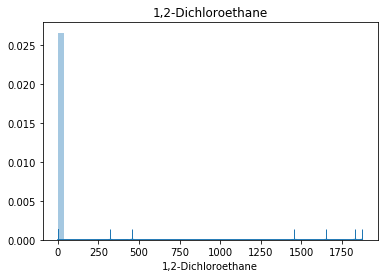

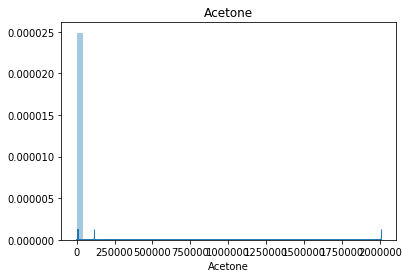

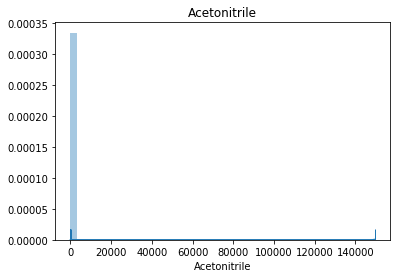

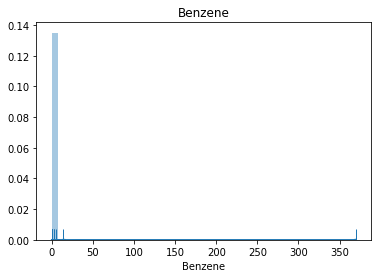

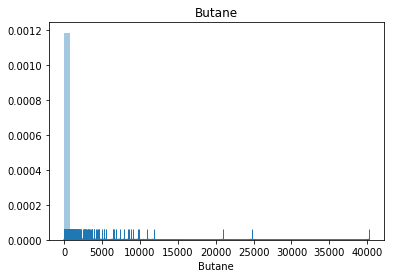

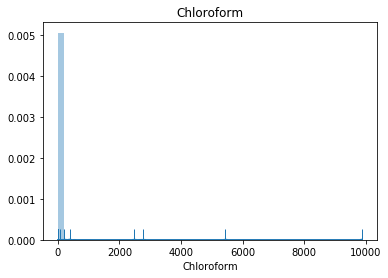

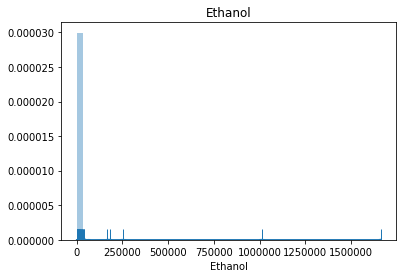

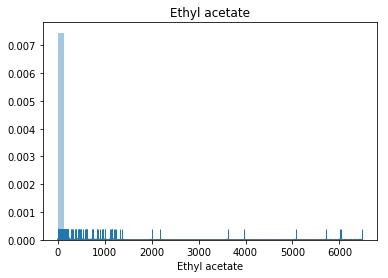

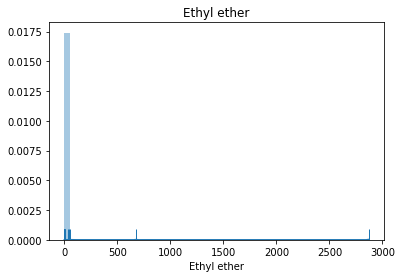

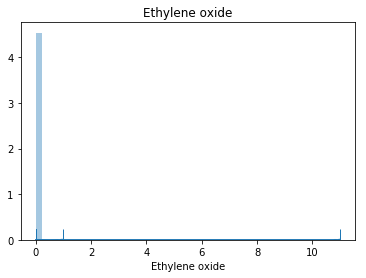

In [ ]:
for column in df_cleaned_res_solve_results.columns:
    if column != 'Dimethylbenzene':
        sns.distplot(df_cleaned_res_solve_results[column], rug=True, norm_hist=True)
        #plt.title('Distribution of %.s measurements in all residual solvent test results' % column)
        plt.title(column)
        plt.show()
        #pp.savefig()

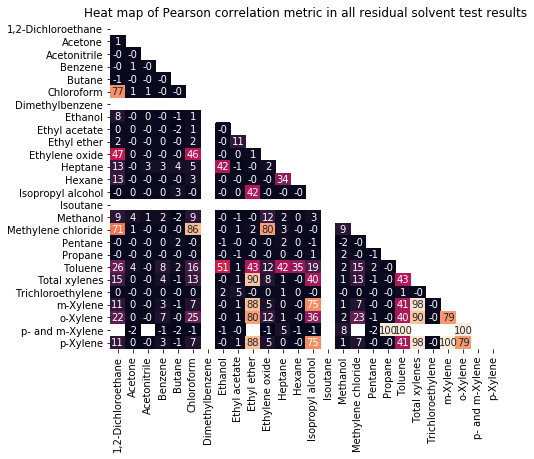

In [5]:
correlations = df_cleaned_res_solve_results.corr()
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(7,6))
plt.title('Heat map of Pearson correlation metric in all residual solvent test results')

corr_heat = sns.heatmap(correlations * 100, annot=True, fmt='.0f', mask=mask, cbar=False)
pp.savefig()

Text(0.5,1,'Amount Chloroform vs 1,2-Dichloroethane, corr=77')

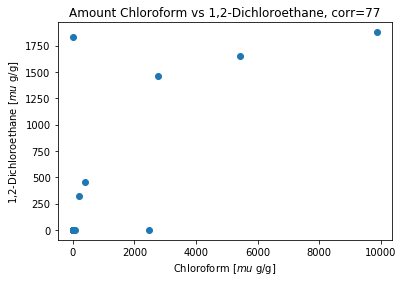

In [10]:
plt.scatter(df_cleaned_res_solve_results['Chloroform'], df_cleaned_res_solve_results['1,2-Dichloroethane'])
fig_size = [7,6]
plt.xlabel('Chloroform [$mu$ g/g]')
plt.ylabel('1,2-Dichloroethane [$mu$ g/g]')
plt.title('Amount Chloroform vs 1,2-Dichloroethane, corr=77')

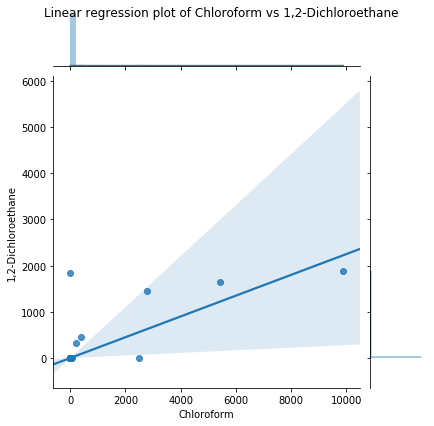

In [11]:
fig = sns.jointplot("Chloroform", "1,2-Dichloroethane", data=df_cleaned_res_solve_results, kind="reg",)
                #xlim=(0, 0.1), ylim=(0, 0.5))
fig_size = [7,6]
plt.xlabel('Chloroform')
plt.ylabel('1,2-Dichloroethane')
plt.suptitle('Linear regression plot of Chloroform vs 1,2-Dichloroethane')
pp.savefig()

Text(0.5,1,'Amount p- and m-Xylene vs 1,2-Dichloroethane, corr=100')

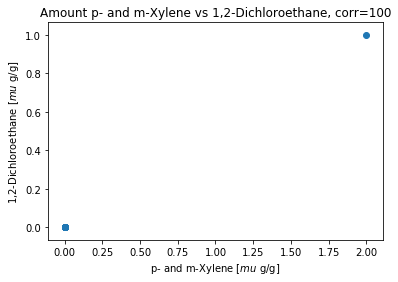

In [7]:
plt.scatter(df_cleaned_res_solve_results['p- and m-Xylene'], df_cleaned_res_solve_results['Propane'])
fig_size = [7,6]
plt.xlabel('p- and m-Xylene [$mu$ g/g]')
plt.ylabel('1,2-Dichloroethane [$mu$ g/g]')
plt.title('Amount p- and m-Xylene vs 1,2-Dichloroethane, corr=100')

In [9]:
mask = ((df_cleaned_res_solve_results['p- and m-Xylene'] > 0) and (df_cleaned_res_solve_results['Propane'] > 0))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().